# **LetsGrowMore - Data Science Internship**

# **TASK 3 -  Next Word Prediction**

### Author : TANAY CHOUBEY
[![alt text](https://logoeps.com/wp-content/uploads/2014/02/25231-github-cat-in-a-circle-icon-vector-icon-vector-eps.png "Git Hub Link")](https://github.com/Tanay-Choubey)

### Problem Statement: Use Tensorflow and Keras library to train an RNN, to predict the next word.

### Dataset link: https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

### Importing the Libraries

In [10]:
import numpy as np
import tensorflow as tf
from nltk.tokenize import RegexpTokenizer
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import LSTM
import matplotlib.pyplot as plt
import pickle
import heapq
import warnings
warnings.filterwarnings("ignore")

### Loading Data and Preprocessing

In [7]:
path = '/content/1661-0.txt'
text = open(path).read().lower()
print('Corpus length:', len(text))

Corpus length: 581888


In [8]:
#Splitting the text file into words
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

print(f'Unique characters : {len(chars)}')

Unique characters : 73


In [9]:
#Chunking 40 characters with 3 sequences
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'Num training examples: {len(sentences)}')

Num training examples: 193950


In [11]:
#Generating the features and labels
X = np.zeros((len(sentences), seq_len, len(chars)), dtype=np.bool)
Y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    Y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]

'e'

In [12]:
X[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [13]:
Y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [14]:
X.shape

(193950, 40, 73)

In [15]:
Y.shape

(193950, 73)

### RNN Model

In [18]:
import keras
from keras.layers import Dense, Activation

model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

### Model Training

In [21]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=10, shuffle=True).history

Epoch 1/10
1440/1440 [==============================] - 161s 110ms/step - loss: 1.9023 - accuracy: 0.4377 - val_loss: 2.1132 - val_accuracy: 0.4103
Epoch 2/10
1440/1440 [==============================] - 158s 110ms/step - loss: 1.6306 - accuracy: 0.5109 - val_loss: 2.0345 - val_accuracy: 0.4360
Epoch 3/10
1440/1440 [==============================] - 155s 108ms/step - loss: 1.5287 - accuracy: 0.5386 - val_loss: 2.0060 - val_accuracy: 0.4395
Epoch 4/10
1440/1440 [==============================] - 156s 108ms/step - loss: 1.4699 - accuracy: 0.5539 - val_loss: 1.9868 - val_accuracy: 0.4564
Epoch 5/10
1440/1440 [==============================] - 157s 109ms/step - loss: 1.4317 - accuracy: 0.5642 - val_loss: 2.0016 - val_accuracy: 0.4583
Epoch 6/10
1440/1440 [==============================] - 164s 114ms/step - loss: 1.4010 - accuracy: 0.5718 - val_loss: 1.9898 - val_accuracy: 0.4548
Epoch 7/10
1440/1440 [==============================] - 158s 110ms/step - loss: 1.3800 - accuracy: 0.5777 - val_

In [22]:
#Saving Our model
model.save('keras.next_word_model.h5')
pickle.dump(history,open('history.p','wb'))

In [23]:
#Loading our Model
model.save('keras.next_word_model.h5')
history=pickle.load(open('history.p','rb'))

### Evaluating The Model

In [24]:
loss_and_acc=model.evaluate(X,Y)
print("Test Loss :", loss_and_acc[0])
print("Test Accuracy :", loss_and_acc[1])

6061/6061 [==============================] - 160s 26ms/step - loss: 1.3175 - accuracy: 0.5958
Test Loss : 1.317523717880249
Test Accuracy : 0.595808207988739


### Visualizing the Model

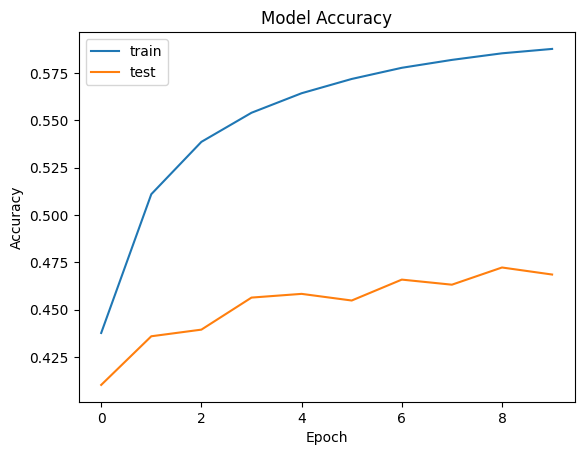

In [25]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

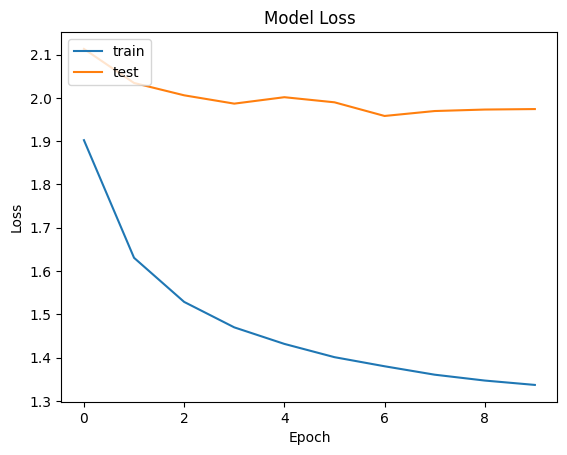

In [26]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

### Testing The Model

In [27]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(chars)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.

    return x

prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### Creating Functions for prediction

In [28]:
#function for predicting the next word
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char

        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [31]:
#function to return samples
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [32]:
#Modified above function to predict multiple characters
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

## Prediction

In [35]:
quotes = ["Never say never, because limits, like fears, are often just an illusion.",
          "Many of life’s failures are people who did not realize how close they were to success when they gave up.",
          "It is hard enough to remember my opinions, without also remembering my reasons for them!",
          "Light the candle instead of cursuing darkness.",
          "You only live once, but if you do it right, once is enough."]

In [36]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

never say never, because limits, like fe
['eling ', 'llow ', 'ars, ', 'wselved ', 'rting ']

many of life’s failures are people who d
['o ', 'id ', 'eeply ', 'ressed. ', 'ay ']

it is hard enough to remember my opinion
[' and ', ', ', '. ', 'ation ', 's ']

light the candle instead of cursuing dar
['k ', 'ing ', 'ds ', 'ming ', 'pore ']

you only live once, but if you do it rig
['ht ', 'ine ', 'er ', 'aned ', 'gred ']



### Conclusion: Our Model is working fine with an accuracy of 0.59. We can see that the model can predict the next word from the sentences.

# **--------------------------------------------Thank You--------------------------------------------**